In [1]:
from arcgis.gis import GIS
gis = GIS(profile='agol_profile')

In [2]:
usa_map = gis.map('USA', zoomlevel=4)  # you can specify the zoom level when creating a map
usa_map

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

## Add a bunch of web layers

In [3]:
flayer_search_result = gis.content.search("owner:esri","Feature Layer", outside_org=True)
flayer_search_result

[<Item title:"USA Detailed Streams" type:Feature Layer Collection owner:esri>,
 <Item title:"2018 USA Traffic Counts" type:Feature Layer Collection owner:esri>,
 <Item title:"World Time Zones" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Core Based Statistical Area" type:Feature Layer Collection owner:esri>,
 <Item title:"World Regions" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Offshore Pipelines" type:Feature Layer Collection owner:esri>,
 <Item title:"World Countries" type:Feature Layer Collection owner:esri>,
 <Item title:"World Continents" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Census Populated Places" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Freeway System" type:Feature Layer Collection owner:esri>]

### Add Item objects

In [6]:
world_timezones_item = flayer_search_result[3]
usa_map.add_layer(world_timezones_item)

### Add Layer objects

In [7]:
usa_freeways_item = gis.content.get("91c6a5f6410b4991ab0db1d7c26daacb")
freeways_flayer = usa_freeways_item.layers[0]
freeways_flayer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1">

In [8]:
usa_map.add_layer(freeways_flayer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})

## remove layers

In [9]:
usa_map.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/usa_cbsa/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1">]

In [10]:
usa_map.remove_layers([freeways_flayer])

True

### draw graphics

In [11]:
draw_map = gis.map('USA', zoomlevel=4)  # you can specify the zoom level when creating a map
draw_map

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

In [12]:
draw_map.draw('rectangle')

In [13]:
draw_map.clear_graphics()

### View 3D Data

In [14]:
draw3d_map = gis.map('USA', zoomlevel=4, mode='3D')
draw3d_map

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=4.0)

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>
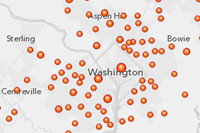

In [19]:
item3D = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
item3D

In [17]:
draw3d_map.add_layer(item3D.layers[0])

### Save map

In [18]:
item_properties={'title':'USA time zones and capitols',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

In [37]:
webmap_item = usa_map.save(item_properties, thumbnail='./webmap_thumbnail.png', folder='webmap_api')
webmap_item

<Item title:"USA time zones and capitols" type:Web Map owner:amani_geosaurus>